In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [2]:
# Last inn dataene
cancer = load_breast_cancer(as_frame=True)

In [3]:
X_data = cancer["data"]
X_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y_data = cancer["target"]
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,random_state=42)

In [6]:
logreg = LogisticRegression(solver='lbfgs',max_iter=5000)
logreg.fit(X_train, y_train)
print("Nøyaktighet = {:.2f}".format(logreg.score(X_test,y_test)))

Nøyaktighet = 0.97


In [13]:
beta0 = logreg.intercept_[0]
beta1 = logreg.coef_[0][0]

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute probabilities from coefficients
X_ = np.linspace(-50, 6, 300)
y_prob = sigmoid(beta0 + beta1 * X_)

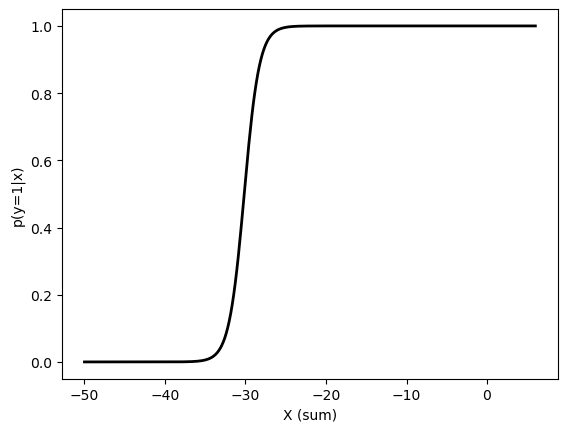

In [16]:

plt.plot(X_, y_prob, color="black", linewidth=2)
plt.xlabel("X (sum)")
plt.ylabel("p(y=1|x)")
plt.show()